# Вебинар 4. Обучение с учителем.

## <center>Машинное обучение<center>

<img src="ml.png" alt="Drawing" style="width: 1000px;">

## <center>Обучение с учителем и без<center>

<img src="SuperUnsuper.png" alt="Drawing" style="width: 1000px;">

## <center>Задачи "Обучения с учителем"<center>

### Регрессия

**Линейная регрессия (линейные алгоритмы)**

<img src="lin_reg.png" alt="Drawing" style="width: 700px;">

### Классификация

**Логистическая регрессия (линейные алгоритмы)**

<img src="bin_class.png" alt="Drawing" style="width: 500px;">

**Случайный лес (нелинейные алгоритмы)**

<img src="bin_class2.jpg" alt="Drawing" style="width: 700px;">

---

**Подключение библиотек и скриптов**

In [1]:
import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
matplotlib.rcParams.update({'font.size': 14})

In [4]:
def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "MAE:\t" + str(round(mae(true_values, pred_values), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3)))
    
    plt.figure(figsize=(10,10))
    
    sns.scatterplot(x=pred_values, y=true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

**Пути к директориям и файлам**

In [5]:
PREPARED_DATASET_PATH = 'housing_prepared.csv'
TRAIN_DATASET_PATH = 'housing_train.csv'
SCALER_FILE_PATH = 'scaler.pkl'
MODEL_FILE_PATH = 'model.pkl' 

### Загрузка данных

**Описание датасета**

Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.

* **longitude** - долгота
* **latitude** - широта
* **housing_median_age** - средний возраст дома
* **total_rooms** - общее количество комнат
* **total_bedrooms** - общее количество спален
* **population** - количество проживающих
* **households** - домохозяйства
* **ocean_proximity** - близость океана
* **median_income** - средний доход
* **median_house_value** - средняя стоимость дома

In [8]:
df = pd.read_csv(PREPARED_DATASET_PATH)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [9]:
df.shape

(20640, 15)

In [10]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
<1H OCEAN               int64
INLAND                  int64
ISLAND                  int64
NEAR BAY                int64
NEAR OCEAN              int64
dtype: object

### Отбор примеров

In [11]:
df['median_house_value'].value_counts().head(10)

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
225000.0     92
350000.0     79
87500.0      78
275000.0     65
150000.0     64
Name: median_house_value, dtype: int64

In [12]:
df = df[df['median_house_value'] <= 500000].reset_index(drop=True)

In [13]:
df['median_house_value'].value_counts().head(10)

137500.0    122
162500.0    117
112500.0    103
187500.0     93
225000.0     92
350000.0     79
87500.0      78
275000.0     65
150000.0     64
175000.0     63
Name: median_house_value, dtype: int64

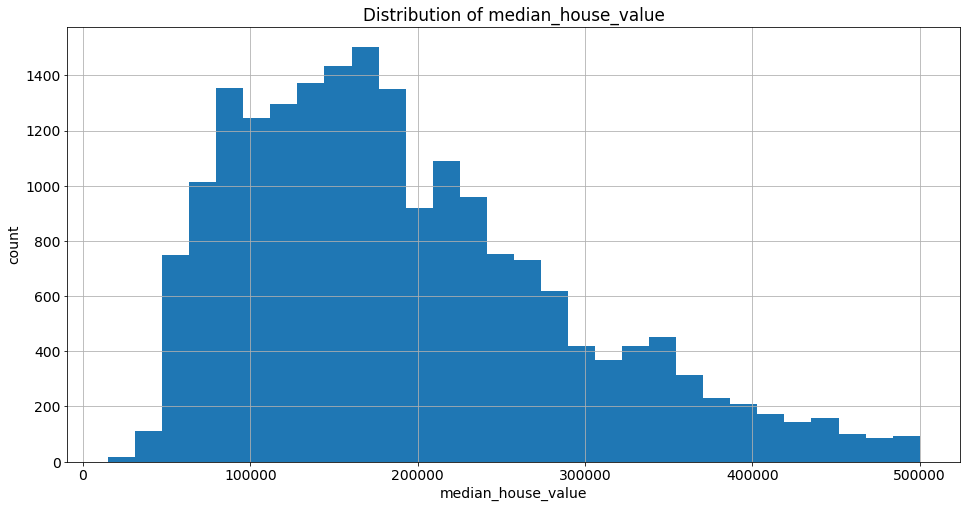

In [14]:
plt.figure(figsize = (16, 8))

df['median_house_value'].hist(bins=30)
plt.ylabel('count')
plt.xlabel('median_house_value')

plt.title('Distribution of median_house_value')
plt.show()

### Отбор признаков

In [15]:
df.columns.tolist()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [16]:
df['ocean_proximity'].value_counts()

<1H OCEAN     8618
INLAND        6515
NEAR OCEAN    2443
NEAR BAY      2094
ISLAND           5
Name: ocean_proximity, dtype: int64

In [17]:
feature_names = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households',
                 'median_income', '<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN']

target_name = 'median_house_value'

In [18]:
df = df[feature_names + [target_name]]
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,1,0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,1,0,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,1,0,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,1,0,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,1,0,342200.0


### Стандартизация признаков

In [19]:
feature_names_for_stand = df[feature_names].select_dtypes(include='float64').columns.tolist()
feature_names_for_stand

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [20]:
scaler = StandardScaler()
stand_features = scaler.fit_transform(df[feature_names_for_stand])

In [21]:
stand_features

array([[-1.32963923,  1.03664377,  1.0243417 , ..., -0.98255785,
        -0.97894646,  2.96038034],
       [-1.32465412,  1.02733991, -0.60423181, ...,  0.85655696,
         1.66159385,  2.94522334],
       [-1.33462434,  1.02268799,  1.92005713, ..., -0.82863482,
        -0.84587575,  2.28035331],
       ...,
       [-0.82614358,  1.75769251, -0.92994652, ..., -0.23682731,
        -0.17791299, -1.25886958],
       [-0.87599464,  1.75769251, -0.84851784, ..., -0.61190412,
        -0.39708827, -1.15238848],
       [-0.83611379,  1.72978094, -1.01137519, ..., -0.04044276,
         0.07518228, -0.82033558]])

In [22]:
df[feature_names_for_stand] = pd.DataFrame(stand_features, columns=feature_names_for_stand)

In [23]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-1.329639,1.036644,1.024342,-0.797584,-0.974311,-0.982558,-0.978946,2.960380,0,0,1,0,452600.0
1,-1.324654,1.027340,-0.604232,2.053478,1.349771,0.856557,1.661594,2.945223,0,0,1,0,358500.0
2,-1.334624,1.022688,1.920057,-0.528477,-0.829205,-0.828635,-0.845876,2.280353,0,0,1,0,352100.0
3,-1.339609,1.022688,1.920057,-0.616957,-0.722159,-0.773789,-0.736288,1.252288,0,0,1,0,341300.0
4,-1.339609,1.022688,1.920057,-0.455126,-0.615113,-0.767596,-0.631919,0.107935,0,0,1,0,342200.0


### Сохранение обучающего датасета

In [24]:
df.to_csv(TRAIN_DATASET_PATH, index=False, encoding='utf-8')

### Разбиение на train и test

In [25]:
X = df[feature_names]
y = df[target_name]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

### Построение базовых моделей и выбор лучшей

**Linear Regression**

In [28]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
? LinearRegression

R2:	0.601
MAE:	45133.557
MSE:	3793807986.074


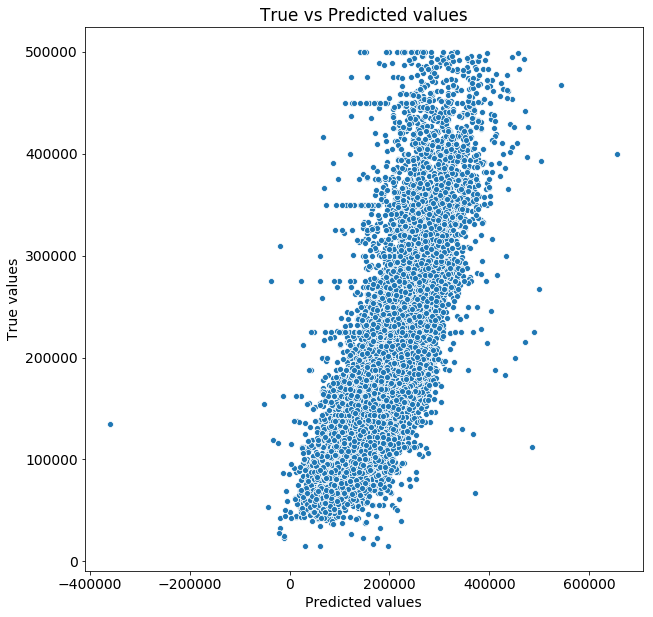

In [33]:
y_train_preds = lr_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.619
MAE:	44484.026
MSE:	3655755686.157


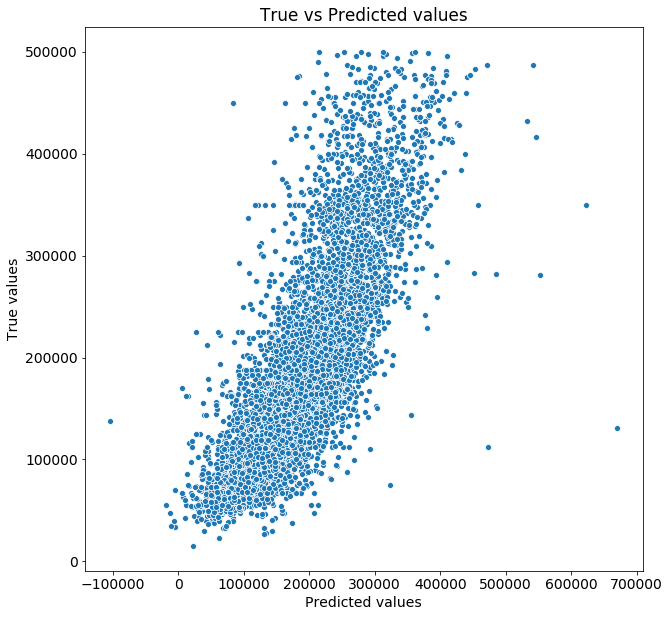

In [79]:
y_test_preds = lr_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

**Random Forest**

In [34]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [35]:
? RandomForestRegressor

R2:	0.957
MAE:	12886.859
MSE:	406583693.722


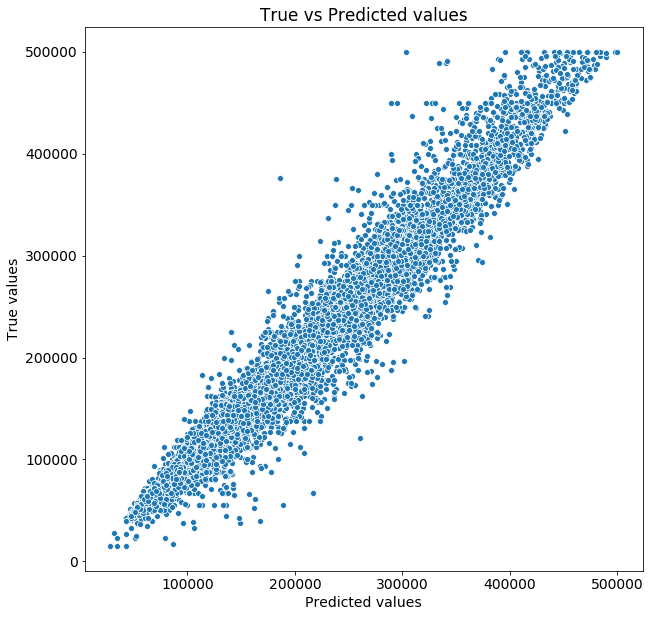

In [36]:
y_train_preds = rf_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.767
MAE:	32198.999
MSE:	2242725406.397


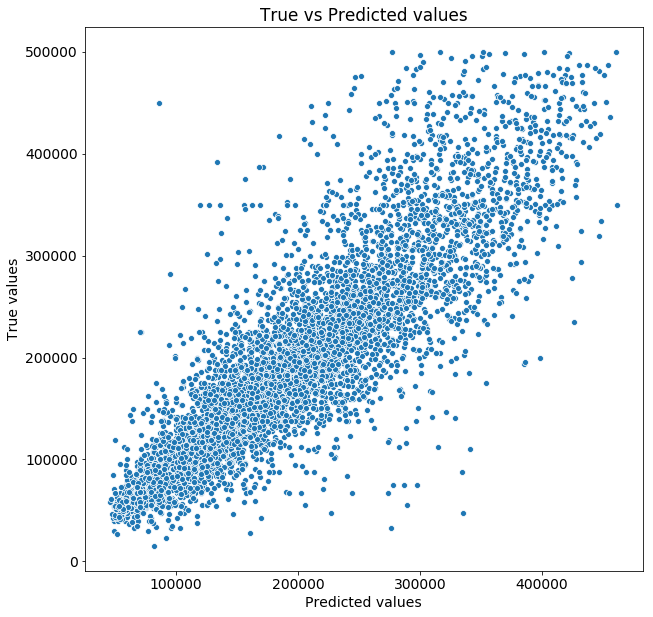

In [37]:
y_test_preds = rf_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

**Gradient Boosting**

In [38]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
? GradientBoostingRegressor

R2:	0.746
MAE:	34968.439
MSE:	2420050618.706


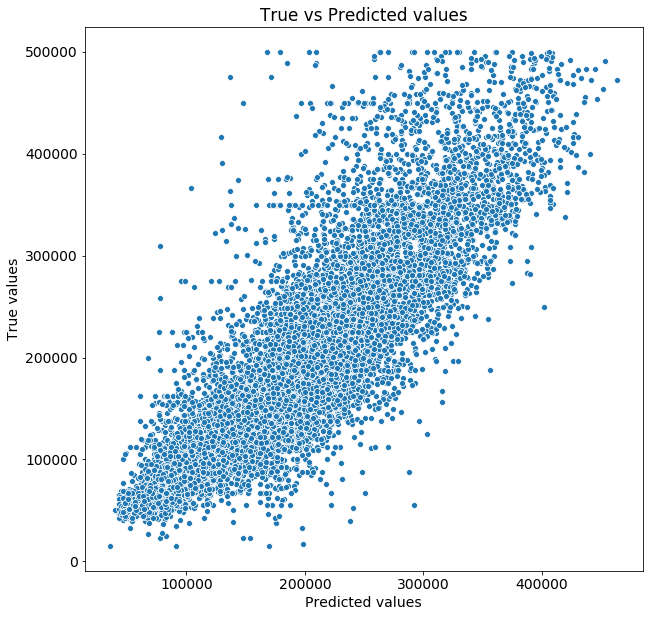

In [41]:
y_train_preds = gb_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.74
MAE:	35757.352
MSE:	2497653103.232


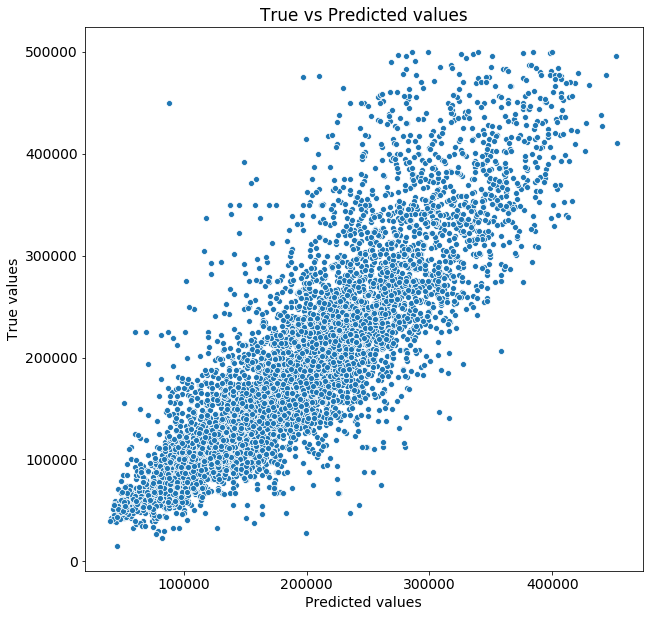

In [42]:
y_test_preds = gb_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

### Настройка и оценка финальной модели

**Подбор гиперпараметров**

In [43]:
gb_model = GradientBoostingRegressor(random_state=21)
gb_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=21, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [44]:
#%%time
params = {'n_estimators':[50, 100, 200, 400], 
          'max_depth':[3, 5, 7, 10]}

gs = GridSearchCV(gb_model, params, scoring='r2', cv=KFold(n_splits=3, random_state=21, shuffle=True), n_jobs=-1)
gs.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=21, shuffle=True),
       error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...te=21, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [50, 100, 200, 400], 'max_depth': [3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [45]:
gs.best_params_

{'max_depth': 7, 'n_estimators': 400}

In [46]:
gs.best_score_

0.8066969099778455

**Обучение и оценка модели**

In [47]:
final_model = GradientBoostingRegressor(n_estimators=400, max_depth=7, random_state=21)
final_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=7, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=21, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

R2:	0.975
MAE:	11374.043
MSE:	236837003.515


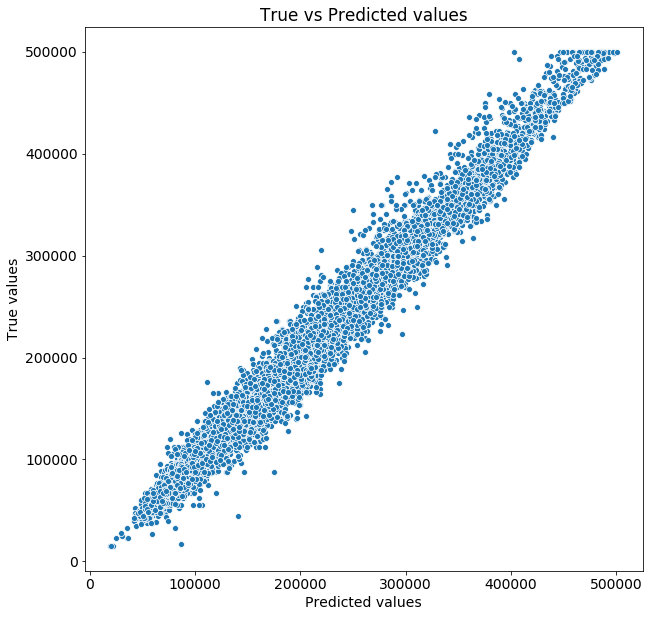

In [48]:
y_train_preds = final_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.814
MAE:	28782.624
MSE:	1787122936.88


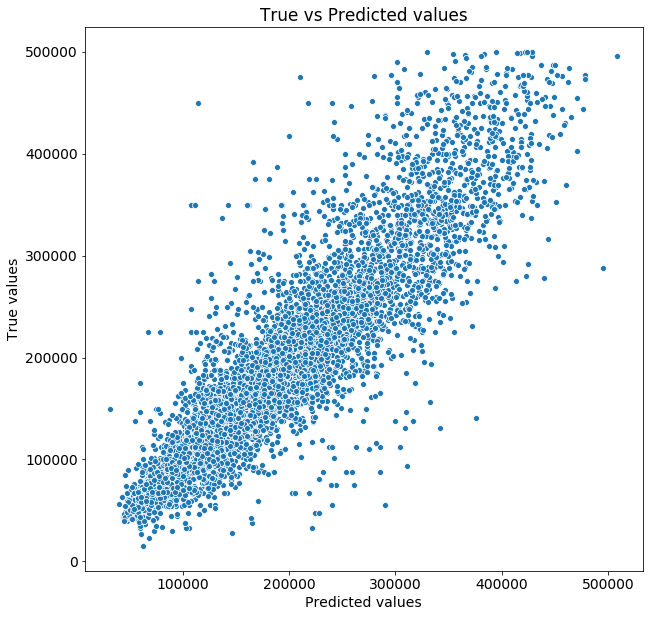

In [49]:
y_test_preds = final_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

**Важность признаков**

In [50]:
feature_importances = pd.DataFrame(zip(X_train.columns, final_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
7,median_income,0.429304
9,INLAND,0.160199
0,longitude,0.121191
1,latitude,0.117008
2,housing_median_age,0.043366
5,population,0.039685
3,total_rooms,0.027870
6,households,0.024609
4,total_bedrooms,0.024371
11,NEAR OCEAN,0.007747


### Сохранение модели

**Scaler**

In [51]:
with open(SCALER_FILE_PATH, 'wb') as file:
    pickle.dump(scaler, file)

**Model**

In [52]:
with open(MODEL_FILE_PATH, 'wb') as file:
    pickle.dump(final_model, file)